In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [78]:
!pip install spectralcluster

You should consider upgrading via the '/home/diego/.pyenv/versions/3.7.2/envs/memoria/bin/python3.7 -m pip install --upgrade pip' command.


In [54]:
def parametrize(df):
    df_new = df.copy()
    for col in df_new.columns:
        if  col in ['Apr','Carrera','Campus','Sem','Depto','Sexo']:
            continue
        try:
                decimal =1
                cols= pd.to_numeric(df_new[col])
                df_new.loc[cols ==0,col]=0
                df_new.loc[ (cols<=45/decimal) & (cols>0), col]=1
                df_new.loc[ (cols>45/decimal) & (cols <= 55/decimal), col]=2
                df_new.loc[ (cols>55/decimal) & (cols <= 65/decimal), col]=3
                df_new.loc[ cols > 65/decimal, col]=4
        except:
                print(name,col)
    
    return df_new

In [55]:
def parametrize_col(x):
    x[x==0] = 0
    x[x<=45] =1
    x[(x>45) & (x<=55)]=2
    x[(x>5) & (x<=65)]=3
    x[(x>6)]=4
    return x

In [129]:
df = pd.read_csv('../All_Rough_data.csv')
deptos = df.Depto
df.drop(columns=['SM9','SM10','Depto'],inplace=True)

In [210]:
#_df = pd.get_dummies(df,columns=['Sem','Campus'])
_df =pd.get_dummies(data=parametrize(df),columns=['Campus','Sexo'])

In [211]:
_df

,C1,C2,CR,S1,S2,S3,S4,S5,S6,S7,...,NF,Carrera,Sem,Apr,labels,Campus_0.0,Campus_1.0,Campus_2.0,Sexo_0,Sexo_1
0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,...,4.0,11,2.0,1,1,1,0,0,1,0
1,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,...,4.0,5,2.0,1,1,1,0,0,1,0
2,4.0,4.0,0.0,4.0,0.0,0.0,4.0,2.0,0.0,4.0,...,4.0,10,2.0,1,0,1,0,0,1,0
3,0.0,4.0,0.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,...,2.0,7,1.0,0,1,1,0,0,1,0
4,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,6,2.0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,1.0,1.0,0.0,4.0,0.0,4.0,4.0,4.0,1.0,3.0,...,1.0,15,2.0,0,0,0,0,1,0,1
3702,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,6,2.0,1,1,0,0,1,1,0
3703,4.0,3.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,6,2.0,1,1,0,0,1,1,0
3704,4.0,3.0,0.0,4.0,4.0,4.0,4.0,4.0,1.0,3.0,...,4.0,6,2.0,1,1,0,0,1,1,0


In [212]:
#tsne= TSNE(n_components=2,perplexity=100).fit_transform(parametrize(_df))
pca = PCA(n_components=19,random_state=42).fit(_df)

In [155]:
spec = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42,assign_labels= 'kmeans').fit(pca.transform(_df))

In [90]:
models= [SpectralClustering(n_clusters=i, affinity='nearest_neighbors', random_state=42,assign_labels= 'kmeans').fit_predict(pca) for i in range(2,21)]
sil_scores=[silhouette_score(pca,model) for model in models[1:]]

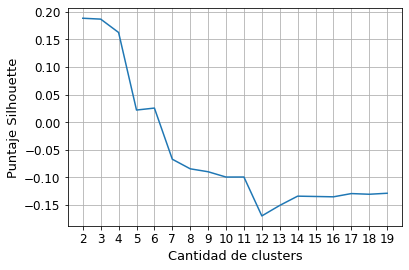

In [91]:
plt.plot(range(2,20), sil_scores )
plt.xticks(ticks=np.arange(2,20,1))
plt.xlabel('Cantidad de clusters',fontdict={'fontsize':13})
plt.ylabel('Puntaje Silhouette',fontdict={'fontsize':13})
plt.tick_params(labelsize=12)
plt.grid()

In [156]:
_df['labels']=spec.labels_
_df

,C1,C2,CR,S1,S2,S3,S4,S5,S6,S7,...,NF,Carrera,Sem,Apr,Campus_0.0,Campus_1.0,Campus_2.0,Sexo_0,Sexo_1,labels
0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,...,4.0,11,2.0,1,1,0,0,1,0,2
1,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,...,4.0,5,2.0,1,1,0,0,1,0,1
2,4.0,4.0,0.0,4.0,0.0,0.0,4.0,2.0,0.0,4.0,...,4.0,10,2.0,1,1,0,0,1,0,0
3,0.0,4.0,0.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,...,2.0,7,1.0,0,1,0,0,1,0,1
4,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,6,2.0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,1.0,1.0,0.0,4.0,0.0,4.0,4.0,4.0,1.0,3.0,...,1.0,15,2.0,0,0,0,1,0,1,0
3702,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,6,2.0,1,0,0,1,1,0,1
3703,4.0,3.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,6,2.0,1,0,0,1,1,0,1
3704,4.0,3.0,0.0,4.0,4.0,4.0,4.0,4.0,1.0,3.0,...,4.0,6,2.0,1,0,0,1,1,0,1


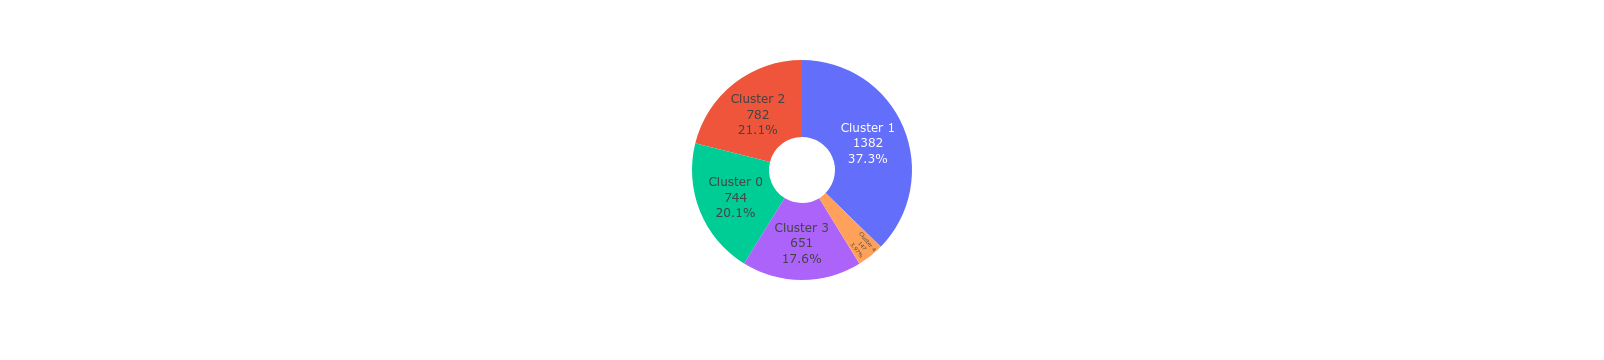

In [157]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
df_pie= _df.labels.value_counts(sort=False).to_frame().reset_index().rename(columns={'index': 'clusters'})
df_pie['clusters']= df_pie.clusters.apply(lambda x: 'Cluster '+str(x))
fig = px.pie(df_pie, values='labels', names='clusters',hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label+value',showlegend=False)
fig.show()
fig.write_image('SpectralPie.png',format='png')

In [158]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

_df2=undummify(_df)

In [159]:
_df2

,C1,C2,CR,S1,S2,S3,S4,S5,S6,S7,...,SM6,SM7,SM8,NF,Carrera,Sem,Apr,Campus,Sexo,labels
0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,...,4.0,4.0,0.0,4.0,11,2.0,1,0.0,0,2
1,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,...,4.0,4.0,4.0,4.0,5,2.0,1,0.0,0,1
2,4.0,4.0,0.0,4.0,0.0,0.0,4.0,2.0,0.0,4.0,...,0.0,4.0,4.0,4.0,10,2.0,1,0.0,0,0
3,0.0,4.0,0.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,...,4.0,4.0,4.0,2.0,7,1.0,0,0.0,0,1
4,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,6,2.0,1,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,1.0,1.0,0.0,4.0,0.0,4.0,4.0,4.0,1.0,3.0,...,0.0,0.0,0.0,1.0,15,2.0,0,2.0,1,0
3702,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,6,2.0,1,2.0,0,1
3703,4.0,3.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,6,2.0,1,2.0,0,1
3704,4.0,3.0,0.0,4.0,4.0,4.0,4.0,4.0,1.0,3.0,...,4.0,4.0,4.0,4.0,6,2.0,1,2.0,0,1


In [160]:
_df2['labels']= spec.labels_
df['labels']= spec.labels_
clusters= _df2.labels.sort_values().unique()

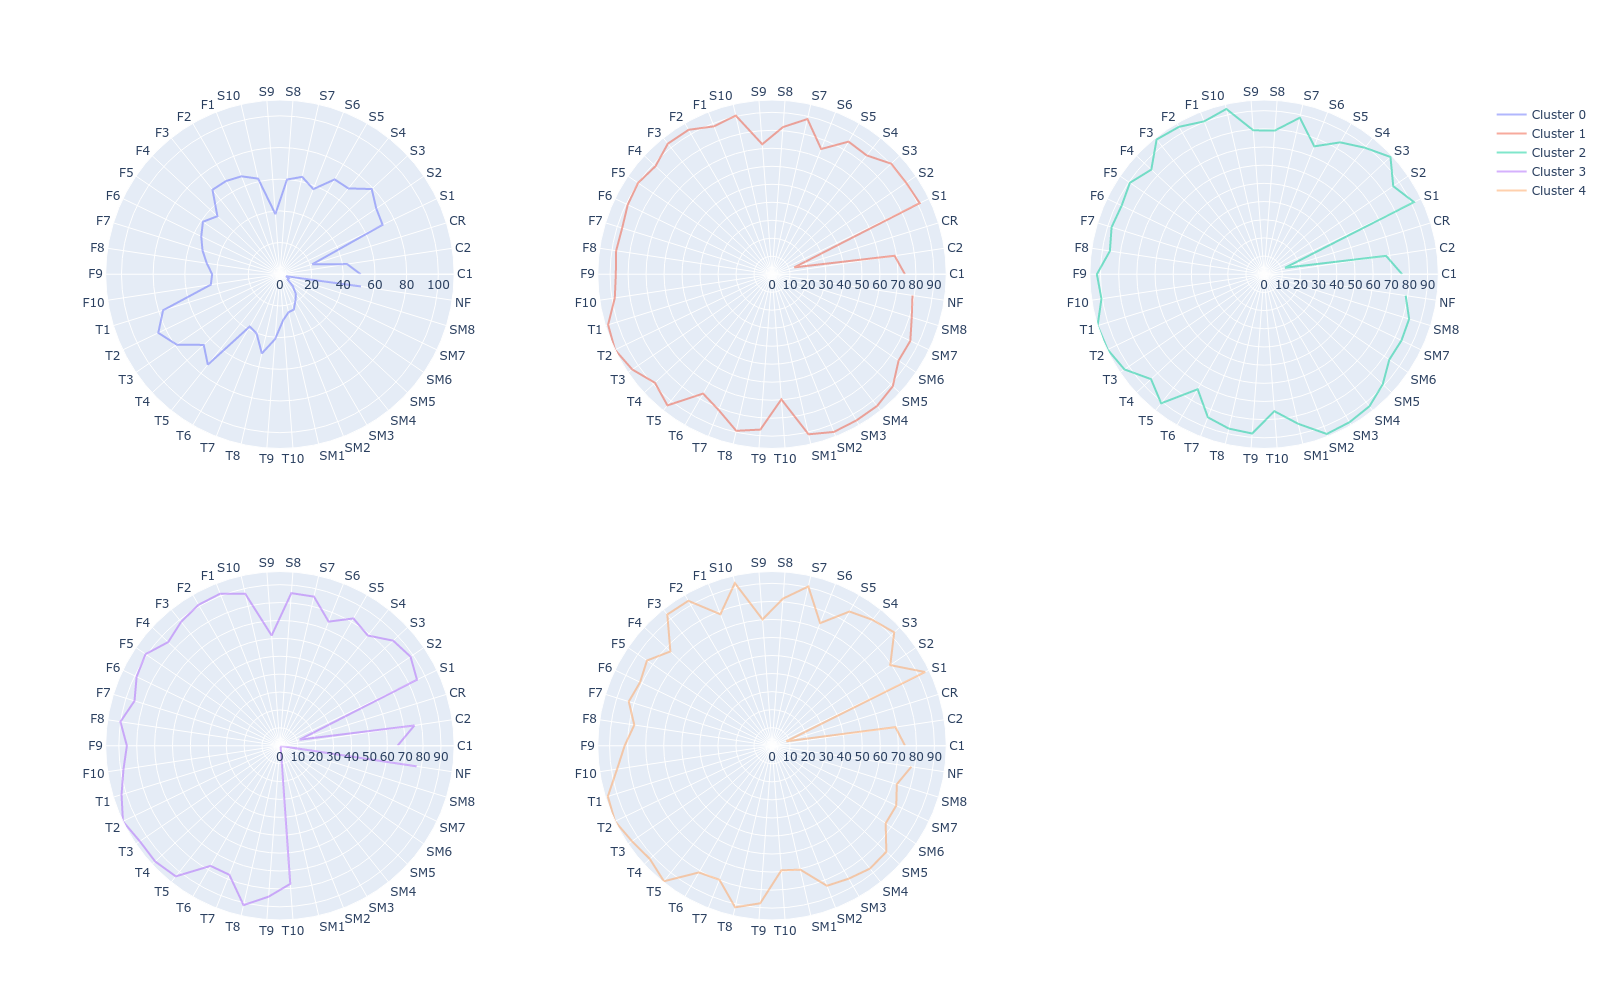

In [161]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

n=3
m=2
db = df.drop(columns=['Carrera','Campus','Sem','Sexo','Apr'])
categories = df.drop(columns=['labels','Carrera','Campus','Sem','Sexo','Apr']).columns
fig = make_subplots(rows=m,cols=n,specs=[[{'type': 'polar'}]*n]*m)

for i in range(len(clusters)):
    radio= db[db.labels ==i].drop(columns=['labels']).mean().values
    fig.add_trace(go.Scatterpolar(
          r= [*radio, radio[0]],
          theta=categories,
          #fill='toself',
            opacity=0.5,
          name=f'Cluster {i}'
    ),
        row=(i//n) +1, 
        col= (i%n) +1      )

fig.update_layout(
    autosize=False,
   width=1200,
    height=1000,
    showlegend=True,
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 110]
    )),
)

fig.show()
fig.write_image('SpectralDetalles.png')

In [162]:
print(pd.concat(
    [
    pd.crosstab(_df2['labels'],_df2['Sexo'],normalize='index').T,
    pd.crosstab(_df2['labels'],_df2['Sem'],normalize='index').T,
    pd.crosstab(_df2['labels'],_df2['Campus'],normalize='index').T,
    pd.crosstab(_df2['labels'],_df2['Apr'],normalize='index').T,
    pd.crosstab(_df2['labels'],_df2['NF'],normalize='index').T
    ]
    ,keys=['Sexo','Semestre','Campus', 'Aprobación','Nota']).to_latex()
)

\begin{tabular}{llrrrrr}
\toprule
     & labels &         0 &         1 &         2 &         3 &         4 \\
\midrule
Sexo & 0 &  0.755376 &  0.751085 &  0.681586 &  0.820276 &  0.585034 \\
     & 1 &  0.244624 &  0.248915 &  0.318414 &  0.179724 &  0.414966 \\
Semestre & 1.0 &  0.655914 &  0.433430 &  0.180307 &  0.947773 &  0.326531 \\
     & 2.0 &  0.344086 &  0.566570 &  0.819693 &  0.052227 &  0.673469 \\
Campus & 0.0 &  0.505376 &  0.452243 &  0.319693 &  0.497696 &  0.353741 \\
     & 1.0 &  0.461022 &  0.445007 &  0.654731 &  0.494624 &  0.421769 \\
     & 2.0 &  0.033602 &  0.102750 &  0.025575 &  0.007680 &  0.224490 \\
Aprobación & 0 &  0.469086 &  0.093343 &  0.095908 &  0.096774 &  0.088435 \\
     & 1.0 &  0.530914 &  0.906657 &  0.904092 &  0.903226 &  0.911565 \\
Nota & 1.0 &  0.379032 &  0.060058 &  0.076726 &  0.073733 &  0.074830 \\
     & 2.0 &  0.090054 &  0.033285 &  0.019182 &  0.023041 &  0.013605 \\
     & 3.0 &  0.185484 &  0.029667 &  0.026854 &  0.062980 &

In [163]:
_df2['Promedio Tareas'] = parametrize_col(df.filter(regex='T').mean(axis=1))
_df2['Promedio Formativos'] = parametrize_col(df.filter(regex='F').mean(axis=1))
_df2['Promedio Actividades'] = parametrize_col(df.filter(regex='SM').mean(axis=1))
_df2['Promedio Tareas'] = parametrize_col(df.filter(regex='T').mean(axis=1))
_df2['Promedio Controles'] = parametrize_col(df.filter(regex='S[0-9]').mean(axis=1))

In [164]:
print(pd.concat(
    [
    pd.crosstab(_df2['labels'],_df2['C1'],normalize='index').T,
    pd.crosstab(_df2['labels'],_df2['C2'],normalize='index').T,
    pd.crosstab(_df2['labels'],_df2['Promedio Controles'],normalize='index').T,
    pd.crosstab(_df2['labels'],_df2['Promedio Tareas'],normalize='index').T,
    pd.crosstab(_df2['labels'],_df2['Promedio Formativos'],normalize='index').T,
    pd.crosstab(_df2['labels'],_df2['Promedio Actividades'],normalize='index').T
    ]
    ,keys=['C1','C2','Promedio Controles', 'Promedio Tareas','Promedio Formativos',' Promedio Actividades']).to_latex()
)

\begin{tabular}{llrrrrr}
\toprule
                      & labels &         0 &         1 &         2 &         3 &         4 \\
\midrule
C1 & 0.0 &  0.055108 &  0.011577 &  0.028133 &  0.010753 &  0.000000 \\
                      & 1.0 &  0.411290 &  0.157019 &  0.094629 &  0.244240 &  0.142857 \\
                      & 2.0 &  0.112903 &  0.088278 &  0.057545 &  0.139785 &  0.102041 \\
                      & 3.0 &  0.075269 &  0.066570 &  0.084399 &  0.107527 &  0.156463 \\
                      & 4.0 &  0.345430 &  0.676556 &  0.735294 &  0.497696 &  0.598639 \\
C2 & 0.0 &  0.310484 &  0.111433 &  0.102302 &  0.078341 &  0.088435 \\
                      & 1.0 &  0.219086 &  0.112880 &  0.135550 &  0.058372 &  0.102041 \\
                      & 2.0 &  0.080645 &  0.068017 &  0.061381 &  0.036866 &  0.047619 \\
                      & 3.0 &  0.072581 &  0.090449 &  0.090793 &  0.098310 &  0.122449 \\
                      & 4.0 &  0.317204 &  0.617221 &  0.609974 &  0.728111 &  0.6

## Validacion

In [165]:
df_val = pd.read_csv('../2021-02.csv').iloc[:,1:]
df_val.drop(columns=['Depto'],inplace=True)

In [166]:
df_val

,C1,C2,CR,S1,S2,S3,S4,S5,S6,S7,...,SM5,SM6,SM7,SM8,NF,Carrera,Campus,Sem,Sexo,Apr
0,84,50,0,100,0,100,40,100,40,100,...,0,100,100,100,66,10,1,2,0,1
1,43,55,55,100,60,100,0,80,80,100,...,100,100,100,100,70,10,1,2,1,1
2,73,40,0,100,100,100,100,80,100,100,...,100,100,100,100,64,10,1,2,0,1
3,100,85,0,100,100,100,100,100,100,100,...,100,100,100,100,95,10,1,2,0,1
4,90,15,20,100,100,100,80,100,80,100,...,100,100,100,100,70,11,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,0,90,50,0,60,75,80,80,40,100,...,0,0,0,0,49,15,2,2,0,0
1188,86,30,0,100,100,100,100,0,60,100,...,0,0,0,0,65,15,2,2,0,1
1189,89,90,0,100,100,100,60,100,100,100,...,100,100,100,0,93,15,2,2,1,1
1190,86,30,0,100,60,12,60,80,60,80,...,100,100,0,100,60,15,2,2,0,1


In [167]:
df_val=df_val.astype({'Campus':float,'Sem':float})
_df_val=pd.get_dummies(data=parametrize(df_val),columns=['Campus','Sexo'])
_df_val.fillna(0,inplace=True)

In [168]:
scores_pca2 = pca.transform(_df_val)

In [169]:
labels2=spec.fit_predict(scores_pca2)

In [170]:
labels2

array([4, 4, 4, ..., 0, 4, 3], dtype=int32)

In [173]:
silhouette_score(pca.transform(_df.drop(columns=['labels'])),_df.labels)

0.16286560877504325

In [174]:
silhouette_score(scores_pca2,labels2)

0.0833401798621704

In [177]:
silhouette_score(pd.concat([pd.DataFrame(pca.transform(_df.drop(columns=['labels']))),pd.DataFrame(scores_pca2)]),pd.Series(np.concatenate([_df.labels,labels2])) )

0.06585697429444506

In [175]:
df_val['labels']= labels2

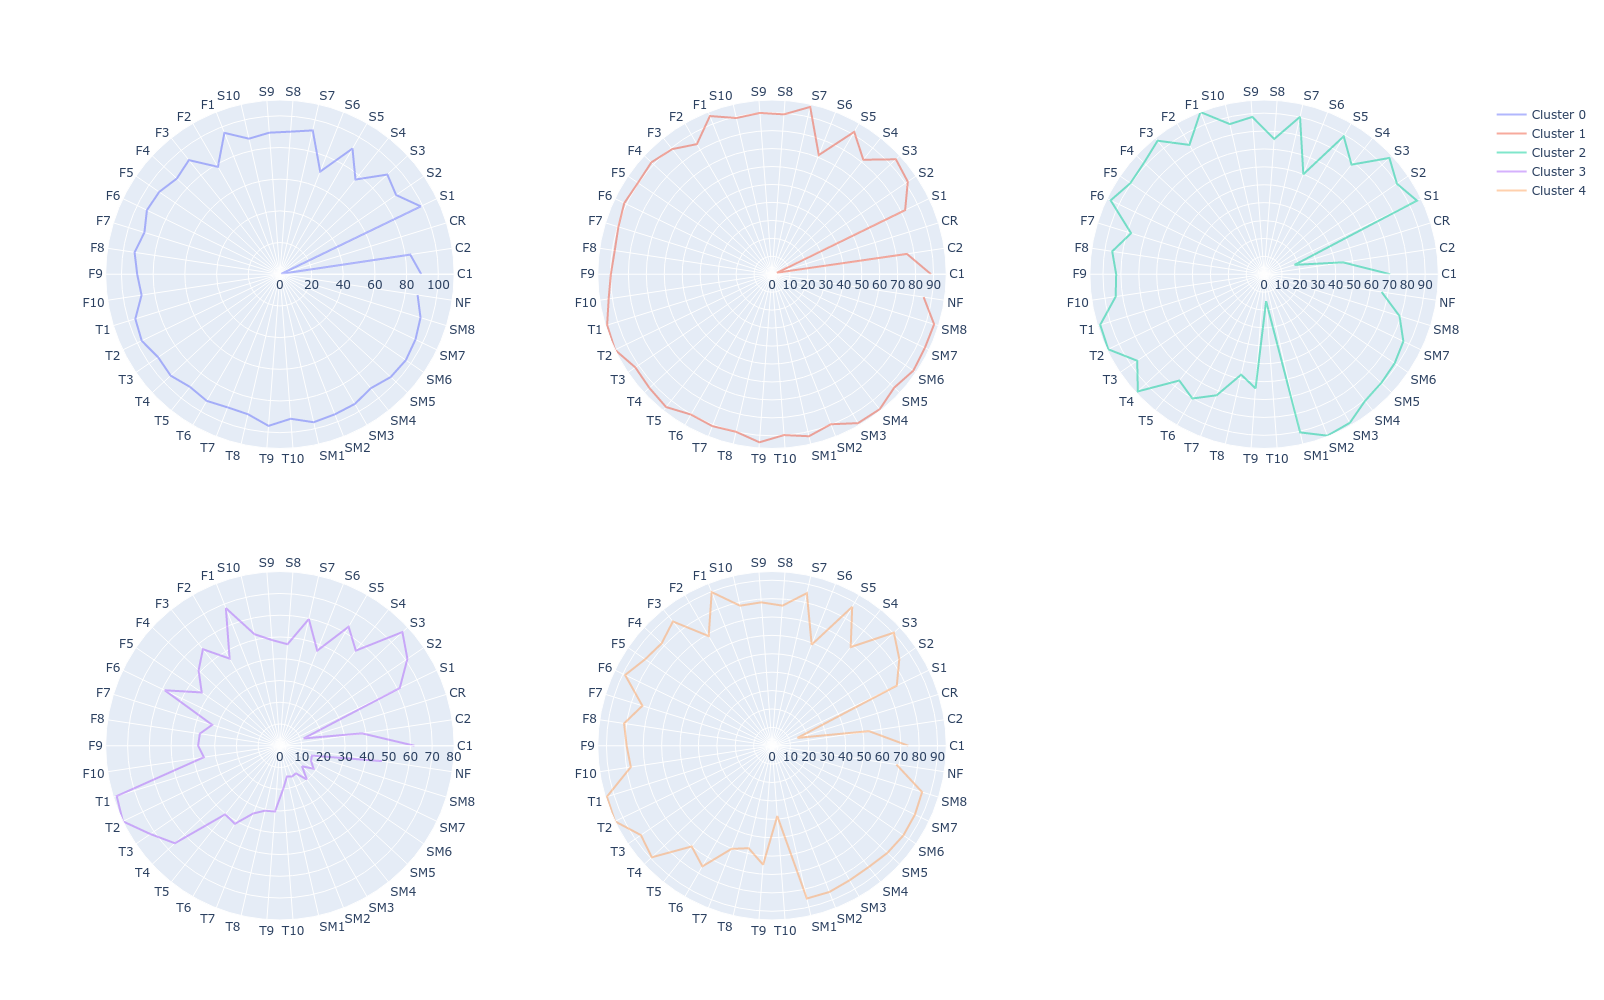

In [176]:
n=3
m=2
db = df_val.drop(columns=['Carrera','Campus','Sem','Sexo','Apr'])
categories = df_val.drop(columns=['labels','Carrera','Campus','Sem','Sexo','Apr']).columns
fig = make_subplots(rows=m,cols=n,specs=[[{'type': 'polar'}]*n]*m)

for i in range(len(clusters)):
    radio= db[db.labels ==i].drop(columns=['labels']).mean().values
    fig.add_trace(go.Scatterpolar(
          r= [*radio, radio[0]],
          theta=categories,
          #fill='toself',
            opacity=0.5,
          name=f'Cluster {i}'
    ),
        row=(i//n) +1, 
        col= (i%n) +1      )

fig.update_layout(
    autosize=False,
   width=1200,
    height=1000,
    showlegend=True,
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 110]
    )),
)

fig.show()

In [209]:
_df

,C1,C2,CR,S1,S2,S3,S4,S5,S6,S7,...,NF,Carrera,Sem,Apr,Campus_0.0,Campus_1.0,Campus_2.0,Sexo_0,Sexo_1,labels
0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,...,4.0,11,2.0,1,1,0,0,1,0,2
1,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,...,4.0,5,2.0,1,1,0,0,1,0,1
2,4.0,4.0,0.0,4.0,0.0,0.0,4.0,2.0,0.0,4.0,...,4.0,10,2.0,1,1,0,0,1,0,0
3,0.0,4.0,0.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,...,2.0,7,1.0,0,1,0,0,1,0,1
4,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,6,2.0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,1.0,1.0,0.0,4.0,0.0,4.0,4.0,4.0,1.0,3.0,...,1.0,15,2.0,0,0,0,1,0,1,0
3702,4.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,6,2.0,1,0,0,1,1,0,1
3703,4.0,3.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,6,2.0,1,0,0,1,1,0,1
3704,4.0,3.0,0.0,4.0,4.0,4.0,4.0,4.0,1.0,3.0,...,4.0,6,2.0,1,0,0,1,1,0,1


In [214]:
from sklearn import metrics
print( f'Davies Bouldin Score: {metrics.davies_bouldin_score(pca.transform(_df),df.labels)}')
print(f'Silhoutte Score: {metrics.silhouette_score(pca.transform(_df),df.labels)}')
print(f'Calinski harabasz Score: {metrics.calinski_harabasz_score(pca.transform(_df),df.labels)}')
metrics.silhouette_samples(pca.transform(_df),df.labels).mean()

Davies Bouldin Score: 2.0084202590385827
Silhoutte Score: 0.1633207026268047
Calinski harabasz Score: 673.5002691293298


0.1633207026268047

In [238]:
df.to_csv('df_spectral.csv',index=False)

In [233]:
from utils import *

In [235]:
predicted_labels=get_predicted_labels(scores_pca2,pca.transform(_df),df.labels)

In [236]:
parametrize(df_val)

,C1,C2,CR,S1,S2,S3,S4,S5,S6,S7,...,SM6,SM7,SM8,NF,Carrera,Campus,Sem,Sexo,Apr,labels
0,4,2,0,4,0,4,1,4,1,4,...,4,4,4,4,10,1.0,2.0,0,1,1
1,1,2,2,4,3,4,0,4,4,4,...,4,4,4,4,10,1.0,2.0,1,1,1
2,4,1,0,4,4,4,4,4,4,4,...,4,4,4,3,10,1.0,2.0,0,1,1
3,4,4,0,4,4,4,4,4,4,4,...,4,4,4,4,10,1.0,2.0,0,1,0
4,4,1,1,4,4,4,4,4,4,4,...,4,4,4,4,11,1.0,2.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,0,4,2,0,3,4,4,4,1,4,...,0,0,0,2,15,2.0,2.0,0,0,1
1188,4,1,0,4,4,4,4,0,3,4,...,0,0,0,3,15,2.0,2.0,0,1,1
1189,4,4,0,4,4,4,3,4,4,4,...,4,4,0,4,15,2.0,2.0,1,1,0
1190,4,1,0,4,3,1,3,4,3,4,...,4,0,4,3,15,2.0,2.0,0,1,1
